# Import libraries

QR code generated for Customer 101
PDF file generated for Customer 101


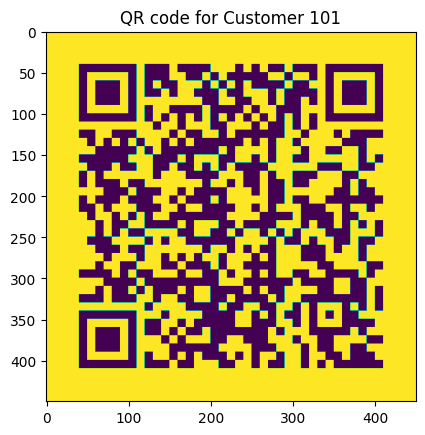

QR code generated for Customer 102
PDF file generated for Customer 102


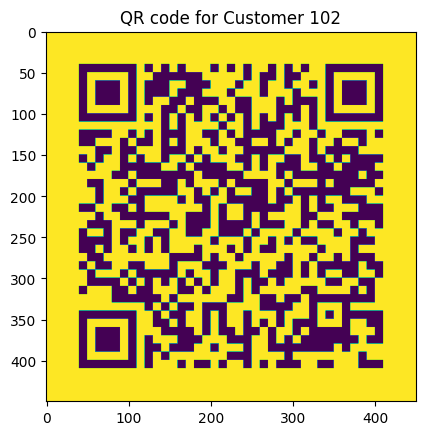

QR code generated for Customer 103
PDF file generated for Customer 103


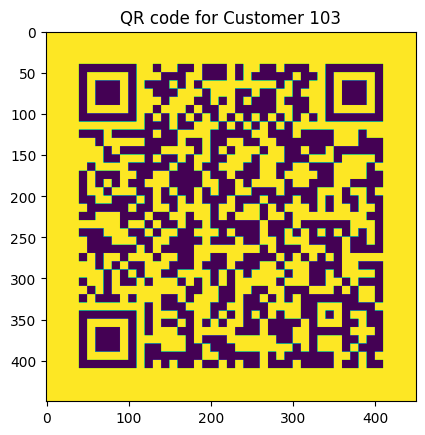

QR code generated for Customer 104
PDF file generated for Customer 104
Process completed.


In [12]:
# %pip install reportlab
# %pip install qrcode
# %pip install pandas

import pandas as pd
import qrcode
import matplotlib.pyplot as plt
import os
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image, Spacer
from reportlab.lib.styles import getSampleStyleSheet

# DataFrame with customer information

data = { 
    "CustomerID": [101, 102, 103, 104],
    "Name": ["John Doe", "Jane Smith", "Michael Johnson", "Emily Brown"],
    "Email": ["john@example.com", "jane@example.com", "michael@example.com", "emily@example.com"],
    "Phone Number": ["123-456-7890", "987-654-3210", "555-123-4567", "888-999-0000"],
    "Mailing Address": ["123 Main St", "456 Elm St", "789 Oak Ave", "555 Pine Rd"],
    "City": ["City A", "City B", "City C", "City D"],
    "Province": ["Province X", "Province Y", "Province Z", "Province W"],
    "Country": ["Country 1", "Country 2", "Country 3", "Country 4"]
}

df_customers = pd.DataFrame(data)

# Function to generate the QR code and save the image to a file
def generate_qr(info, full_filename):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(info)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    img.save(full_filename)
    return img

# Folder path where PDF and QR code files will be saved
folder_path = "C:\\Users\\Admin\\Desktop\\Portfolio\\PDF_Generation\\Output"

# Check if the folder exists and create it if it doesn't
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Generate QR codes and PDF files for each customer
for index, customer in df_customers.iterrows():
    customer_id = customer["CustomerID"]
    customer_name = customer["Name"]
    customer_email = customer["Email"]
    customer_city = customer["City"]
    customer_province = customer["Province"]
    
    # Combine the information into a single text
    customer_info = f"CustomerID: {customer_id}\nName: {customer_name}\nEmail: {customer_email}\nCity: {customer_city}\nProvince: {customer_province}"
    
    full_qr_filename = os.path.join(folder_path, f"QR_Customer_{customer_id}.png")  # Complete path of the QR code
    img_qr = generate_qr(customer_info, full_qr_filename)
    print(f"QR code generated for Customer {customer_id}")
    
    # Create a PDF with the customer's QR code
    pdf_file = os.path.join(folder_path, f"QR_Customer_{customer_id}.pdf")
    doc = SimpleDocTemplate(pdf_file, pagesize=letter)
    story = []
    
    # Style for the content in the PDF
    styles = getSampleStyleSheet()
    style = styles["Normal"]
    
    # Add the QR code to the PDF
    qr_image = Image(full_qr_filename, width=100, height=100)
    story.append(Spacer(1, 20))
    story.append(Paragraph(f"QR code for Customer {customer_id}", style))
    story.append(Paragraph(customer_info, style))  # Add customer info to PDF
    story.append(qr_image)
    
    # Close the PDF file
    doc.build(story)
    print(f"PDF file generated for Customer {customer_id}")
    
    # Display the first 3 QR codes
    if index < 3:
        plt.imshow(img_qr)
        plt.title(f"QR code for Customer {customer_id}")
        plt.show()

print("Process completed.")
